# Example Notebook for TAFT
## Time alignment for tiles 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


In [2]:
mu3e_detector = Detector.initFromROOT("run42_20000.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [3]:
#mu3e_detector.save("test_detector_file")

In [4]:
melp.taft.select(mu3e_detector)

In [5]:
mu3e_detector.TileDetector.tile[202003].dt
dt = []
for tile in mu3e_detector.TileDetector.tile:
    dt.append(mu3e_detector.TileDetector.tile[tile].dt)

In [6]:
dt = np.array(dt)

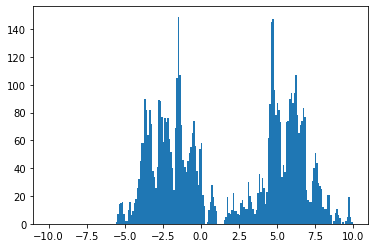

In [7]:
plt.hist(dt, bins=200, range=(-10,10))
plt.show()

In [8]:
#%%capture
resid_z, resid_phi, cal, cal_phi = melp.taft.calibrate("/run/media/maximilian/Volume/big_run_data/merged.root", station=1)
#resid_z, resid_phi, cal, cal_phi = melp.taft.calibrate("run42_20000.root", station=1)

In [9]:
resid_z = np.array(resid_z)
resid_phi = np.array(resid_phi)

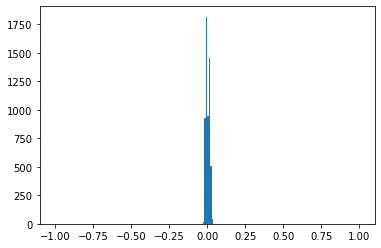

In [10]:
plt.hist(resid_z, bins=200, range=(-1,1))
plt.show()

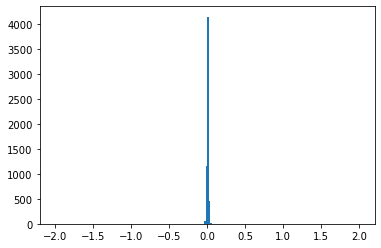

In [11]:
plt.hist(resid_phi, bins=200, range=(-2,2))
plt.show()

# small data set results in empty histograms between some tiles
## -> big jumps in dt

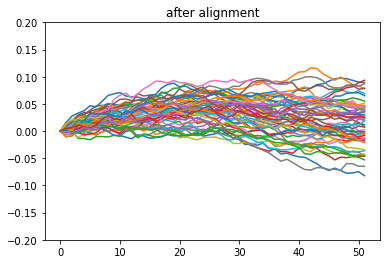

In [12]:
for phi in cal:
    plt.plot(cal[phi])

plt.ylim(-0.2,0.2)
plt.title("after alignment")
plt.show()

In [13]:
cal1 = {}
for phi_row in range(56):
    dt_truth = [0]
    for tile in range(0, 51):

        dt_tmp = (mu3e_detector.TileDetector.tile[300000 + phi_row + tile * 56].dt -
                   mu3e_detector.TileDetector.tile[300000 + phi_row + (tile+1) * 56].dt)
        dt_truth.append(dt_truth[-1] + dt_tmp)

    cal1[phi_row] = np.array(dt_truth)


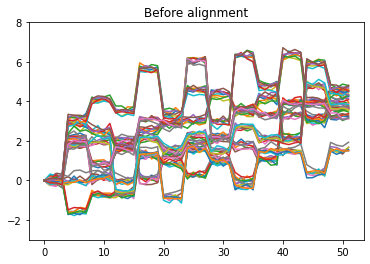

In [14]:
for phi in cal1:
    plt.plot(np.array(cal1[phi], dtype=object))

plt.ylim(-3,8)
plt.title("Before alignment")
plt.show()

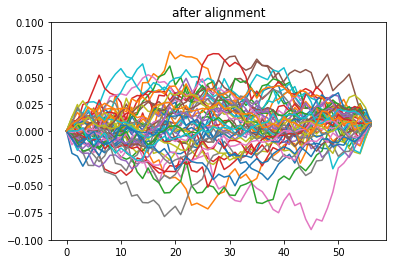

In [15]:
for z_column in cal_phi:
    plt.plot(cal_phi[z_column])

plt.ylim(-0.1,0.1)
plt.title("after alignment")
plt.show()

In [16]:
cal2 = {}
for z_column in range(52):
    dt_truth = [0]
    for tile in range(0, 56):
        
        tile_id = (200000 + z_column*56 + tile)

        dt_tmp = (mu3e_detector.TileDetector.tile[tile_id].dt -
                   mu3e_detector.TileDetector.tile[mu3e_detector.TileDetector.getNeighbour(tile_id, "up")].dt)
        dt_truth.append(dt_truth[-1] + dt_tmp)

    cal2[z_column] = np.array(dt_truth)


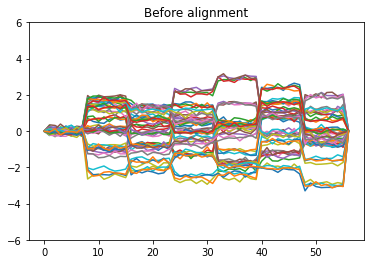

In [17]:
for z_column in cal2:
    plt.plot(np.array(cal2[z_column], dtype=object))

plt.ylim(-6,6)
plt.title("Before alignment")
plt.show()